<a href="https://colab.research.google.com/github/YuricoBagusDwiAnggoro/pertemuan9/blob/main/PeremuanDAA9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
#Adjacency Matrix
import numpy as np

#Define the adjancency matrix
adjacency_matrix = np.array([[0, 1, 0, 0],
                             [0, 0, 1, 0],
                             [0, 1, 0, 1],
                             [1, 0, 1, 0]])

#Set the damping factor
damping_factor = 0.85

#Initialize the PageRank values
num_pages = len(adjacency_matrix)
page_rank = np.ones(num_pages) / num_pages

#number of iterations
num_iterations = 100

for i in range(num_iterations):
    new_page_rank = np.zeros(num_pages)
    for j in range(num_pages):
        #calculate the PageRank contribution from each linking page
        linking_pages = [k for k in range(num_pages) if adjacency_matrix[k, j] == 1]
        for linking_page in linking_pages:
            new_page_rank[j] += page_rank[linking_page] / sum(adjacency_matrix[linking_page, :])
        new_page_rank[j] = damping_factor * new_page_rank[j] + (1 - damping_factor) / num_pages
    page_rank = new_page_rank

#Print the final PageRanl values
for page, rank in enumerate(page_rank):
    print(f"PR(Page {page + 1}) = {rank:.3f} ")

PR(Page 1) = 0.122 
PR(Page 2) = 0.302 
PR(Page 3) = 0.378 
PR(Page 4) = 0.198 


In [29]:
# Latihan

def PageRank(array):
  # Latihan
  adjacency_matrix = np.array (array)

  # Set the damping factor
  damping_factor = 0.85

  # Initialize the PageRank values
  num_pages = len(adjacency_matrix)
  page_rank = np.ones(num_pages) / num_pages

  # Number of iterations
  num_iterations = 100

  for i in range(num_iterations):
    new_page_rank = np.zeros(num_pages)
    for j in range(num_pages):
      # Calculate the PageRank contribution from each linking page
      linking_pages = [k for k in range(num_pages) if adjacency_matrix[k, j] == 1]
      for linking_page in linking_pages:
        new_page_rank[j] += page_rank[linking_page] / sum(adjacency_matrix[linking_page, :])
      new_page_rank[j] = damping_factor * new_page_rank[j] + (1 - damping_factor) / num_pages
    page_rank = new_page_rank

  #  Print the final PageRank values
  for page, rank in enumerate(page_rank):
    print(f"PR(Page {page + 1}) = {rank:.3f}")

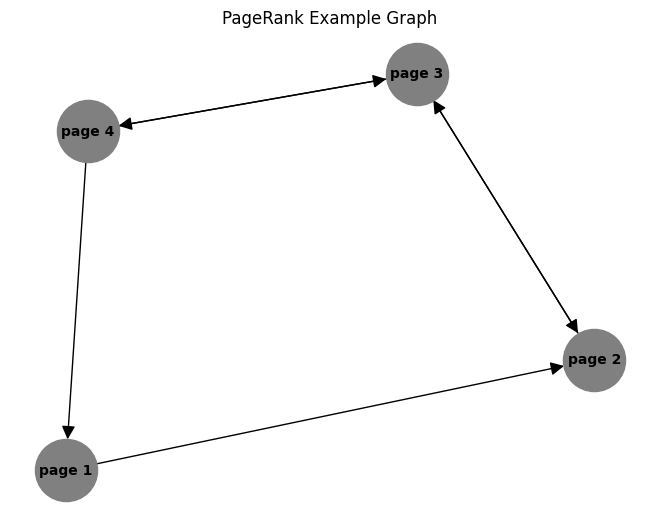

In [30]:
#Membuat Graph dari Adjacency Matrix
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

#Define the adjacency matrix
adjacency_matrix = np.array([[0, 1, 0, 0],
                             [0, 0, 1, 0],
                             [0, 1, 0, 1],
                             [1, 0, 1, 0]])

#Create a directed graph
G = nx.DiGraph()

#Add nodes
num_pages = len(adjacency_matrix)
G.add_nodes_from(range(num_pages))

#Add edges based on the adjacency matrix
for i in range(num_pages):
    for j in range(num_pages):
        if adjacency_matrix[i, j] == 1:
            G.add_edge(i, j)

#Draw the graph
pos = nx.spring_layout(G) #layout the graph
labels = {i: f"page {i+1}" for i in range(num_pages)}
nx.draw(G, pos, with_labels = True, labels = labels, node_size = 2000, node_color = 'Gray', font_size = 10, font_color = 'black', font_weight = 'bold', arrowsize = 20)
plt.title("PageRank Example Graph")
plt.show()

In [31]:
# Latihan

def GraphAdjacencyMatrix(array):
  # Define the adjacency matrix
  adjacency_matrix = np.array (array)

  # Create a directed graph
  G = nx.DiGraph()

  # Add nodes
  num_pages = len(adjacency_matrix)
  G.add_nodes_from(range(num_pages))

  # Add edges based on the adjacency matrix
  for i in range(num_pages):
    for j in range(num_pages):
      if adjacency_matrix[i, j] == 1:
        G.add_edge(i, j)

  # Draw the graph
  pos = nx.spring_layout(G) # Layout the graph
  labels = {i: f"Page {i+1}" for i in range(num_pages)}
  nx.draw(G, pos, with_labels=True, labels=labels, node_size=2000, node_color='Gray', font_size=10, font_color="black", font_weight="bold", arrowsize=20)
  plt.title("PageRank Graph")
  plt.show()

In [32]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
myWeb = nx.DiGraph()
myPages = range(1, 5)

In [34]:
connections = [(1, 3),(2, 1),(2, 3),(3, 1),(3, 2),(3, 4),(4, 5),(5, 1),(5, 4)]
myWeb.add_nodes_from(myPages)
myWeb.add_edges_from(connections)

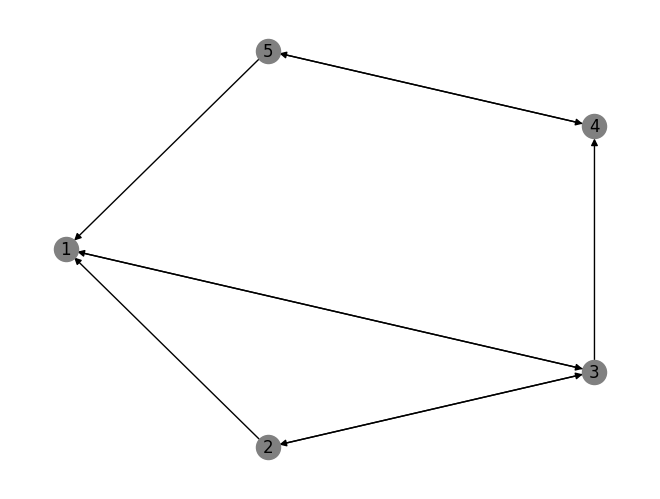

In [35]:
pos = nx.shell_layout(myWeb)
nx.draw(myWeb, pos, arrows = True, with_labels = True, node_color = 'gray')
plt.show()

In [36]:
import networkx as nx
import numpy as np

def CreatePageRank(aGraph):
  nodes_set = len(aGraph)
  M = nx.to_numpy_array(aGraph) # Menggunakan metode to_numpy_array
  outwards = np.squeeze(np.asarray(np.sum(M, axis=1)))
  prob_outwards = np.array(1.0 / outwards)
  G = np.multiply(M, prob_outwards[:, np.newaxis])

  p = np.ones(nodes_set) / float(nodes_set)
  return G, p

# Contoh penggunaan:
myWeb = nx.DiGraph()
connections = [(1, 3), (2, 1), (2, 3), (3, 1), (3, 2), (3, 4), (4, 5), (5, 1), (5, 4)]
myWeb.add_edges_from(connections)

G, p = CreatePageRank(myWeb)
print(G)

[[0.         1.         0.         0.         0.        ]
 [0.33333333 0.         0.33333333 0.33333333 0.        ]
 [0.5        0.5        0.         0.         0.        ]
 [0.         0.         0.         0.         1.        ]
 [0.5        0.         0.         0.5        0.        ]]


In [37]:
import numpy as np

# Matriks adjacency (0 berarti tidak ada atutan, 1 berarti ada tautan)
adjacency_matrix = np.array([[0, 1, 1, 1, 0],
                              [0, 0, 1, 0, 0],
                              [1, 0, 0, 0, 0],
                              [0, 0, 1, 0, 1],
                              [0, 0, 1, 1, 0]])

# Inisialisasi nilai awal PageRank
pagerank = np.array([1, 1, 1, 1, 1], dtype=float)

# Faktor damping
damping_factor = 0.85

# Jumlah iterasi
num_iterations = 100

for _ in range(num_iterations):
  # Inisialisasi PageRank baru
  new_pagerank = np.zeros(pagerank.shape, dtype=float)

  for i in range(adjacency_matrix.shape[0]):
    for j in range(adjacency_matrix.shape[1]):
      # Hitung jumlah tautan keluar dari halaman i
      num_outlinks = np.sum(adjacency_matrix[i, :])

      # Perbarui PageRank berdasarkan rumus PageRank
      if num_outlinks > 0:
        new_pagerank[j] += (damping_factor * pagerank[i] / num_outlinks)

  # Normaliasasi PageRank
  new_pagerank += (1 - damping_factor) / len(pagerank)

  # Perbarui nilai PageRank
  pagerank = new_pagerank

# Hasil PageRank
print("Hasil PageRank:")
print(pagerank)

Hasil PageRank:
[1.72510772e+45 1.72510772e+45 1.72510772e+45 1.72510772e+45
 1.72510772e+45]


In [38]:
import numpy as np

# Jumlah halaman
num_pages = 5

# Vectors of outlinks
outlinks = np.array([3, 2, 1, 2, 2])

# Vectors of inlinks
inlinks = np.array([1, 2, 1, 2, 1])

# Inisialisasi nilai awal PageRank
pagerank = np.ones(num_pages, dtype=float) / num_pages

# Faktor damping
damping_factor = 0.85

# Jumlah iterasi
num_iterations = 100

for _ in range(num_iterations):
  # Inisialisasi PageRank baru
  new_pagerank = np.zeros(num_pages, dtype=float)

  for i in range(num_pages):
    for j in range(num_pages):
      if i != j and outlinks[j] > 0:
        new_pagerank[i] += damping_factor * (pagerank[j] / outlinks[j])

  # Terapkan faktor damping dan tambahkan nilai konstan
  pagerank = (1 - damping_factor) / num_pages + new_pagerank

# Hasil PageRank
print("Hasil PageRank:")
for i, pr in enumerate(pagerank):
  print(f"Halaman {chr(ord('A') + i)}: {pr:.4f}")

Hasil PageRank:
Halaman A: 379781916076663755421777920.0000
Halaman B: 356329657326501560173199360.0000
Halaman C: 300635253803169860934434816.0000
Halaman D: 356329657326501628892676096.0000
Halaman E: 356329657326501628892676096.0000


In [39]:
# Latihan 1
matrixPertama = [[0, 1, 0, 0, 0, 0],
                 [0, 0, 1, 0, 0, 0],
                 [0, 0, 0, 1, 0, 0],
                 [0, 0, 0, 0, 1, 0],
                 [0, 0, 0, 0, 0, 1],
                 [0, 0, 0, 0, 0, 0]]

connections1 = [(1, 2), (2, 3), (3, 4), (4, 5), (5, 6)]

PageRank(matrixPertama)

PR(Page 1) = 0.025
PR(Page 2) = 0.046
PR(Page 3) = 0.064
PR(Page 4) = 0.080
PR(Page 5) = 0.093
PR(Page 6) = 0.104


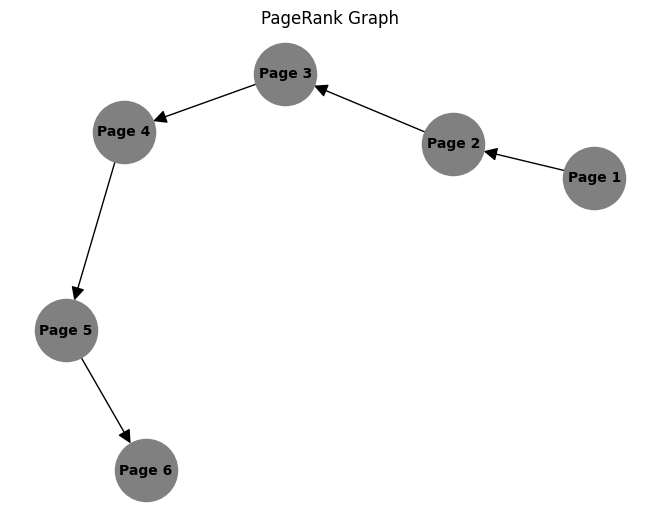

In [40]:
# Latihan 1
GraphAdjacencyMatrix(matrixPertama)

In [41]:
# Latihan m2
matrixKedua = [[0, 1, 0, 0, 0],
               [0, 0, 1, 0, 0],
               [0, 0, 0, 1, 0],
               [0, 0, 0, 0, 1],
               [1, 0, 0, 0, 0]]

connections2 = [(1, 2), (2, 1), (2, 3), (3, 2), (3, 4), (4, 3)]

PageRank(matrixKedua)

PR(Page 1) = 0.200
PR(Page 2) = 0.200
PR(Page 3) = 0.200
PR(Page 4) = 0.200
PR(Page 5) = 0.200


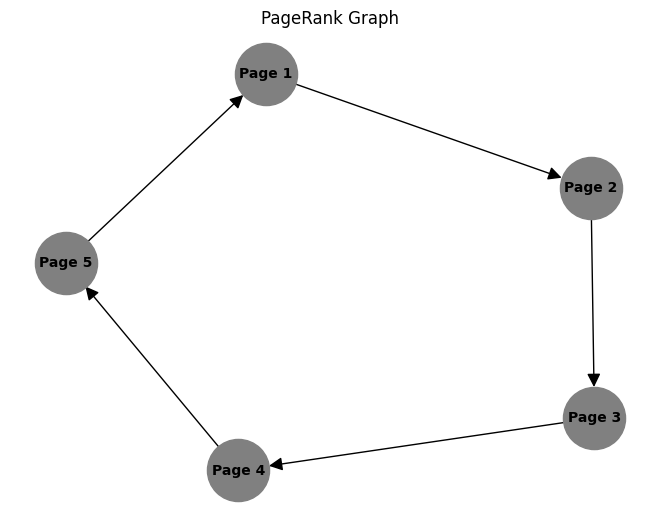

In [42]:
# Latihan 2
GraphAdjacencyMatrix(matrixKedua)

In [43]:
# Latihan 3
matrixKetiga = [[0, 1, 0, 0],
                [1, 0, 1, 0],
                [0, 1, 0, 1],
                [0, 0, 1, 0]]

connections3 = [(1, 2), (2, 1), (2, 3), (3, 2), (3, 4), (4, 3)]

PageRank(matrixKetiga)

PR(Page 1) = 0.175
PR(Page 2) = 0.325
PR(Page 3) = 0.325
PR(Page 4) = 0.175


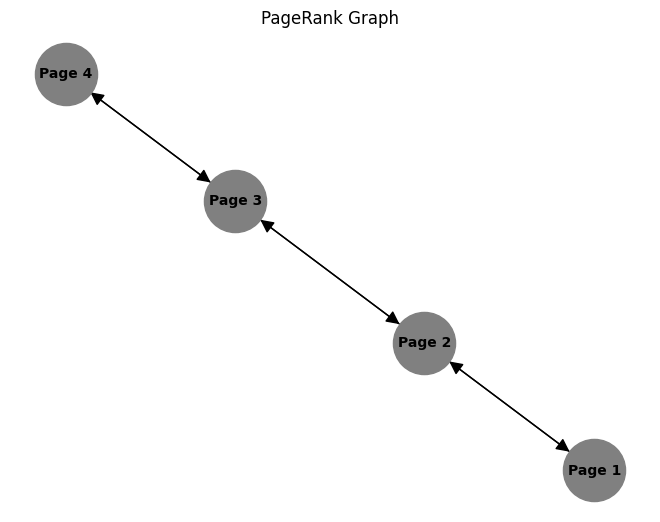

In [44]:
# Latihan 3
GraphAdjacencyMatrix(matrixKetiga)

In [45]:
# Latihan 4
matrixKeempat = [[0, 1, 0, 0, 0, 0],
          [0, 0, 1, 0, 0, 0],
          [0, 0, 0, 1, 0, 0],
          [0, 0, 0, 0, 1, 0],
          [0, 0, 0, 0, 0, 1],
          [1, 0, 0, 0, 0, 0]]

connections4 = [(1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 1)]

PageRank(matrixKeempat)

PR(Page 1) = 0.167
PR(Page 2) = 0.167
PR(Page 3) = 0.167
PR(Page 4) = 0.167
PR(Page 5) = 0.167
PR(Page 6) = 0.167


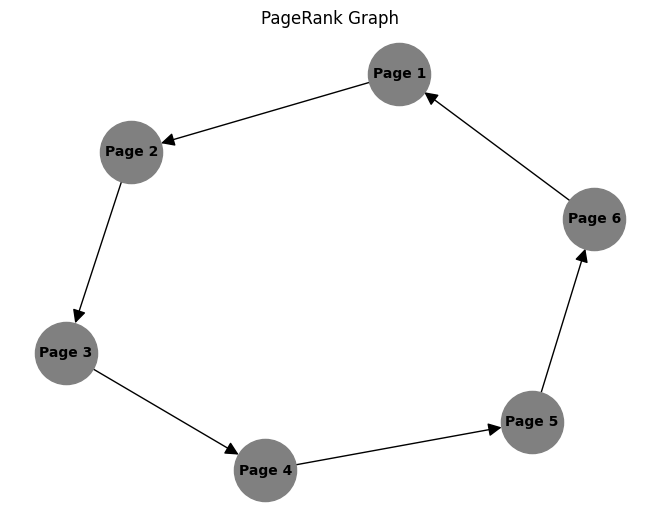

In [46]:
# Latihan 4
GraphAdjacencyMatrix(matrixKeempat)

In [47]:
# Latihan 5
matrixKelima = [[0, 1, 0, 0],
          [1, 0, 1, 0],
          [0, 1, 0, 1],
          [1, 0, 1, 0]]

connections5 = [(1, 2), (2, 1), (2, 3), (3, 2), (3, 4), (4, 3), (4, 1)]

PageRank(matrixKelima)

PR(Page 1) = 0.250
PR(Page 2) = 0.356
PR(Page 3) = 0.250
PR(Page 4) = 0.144


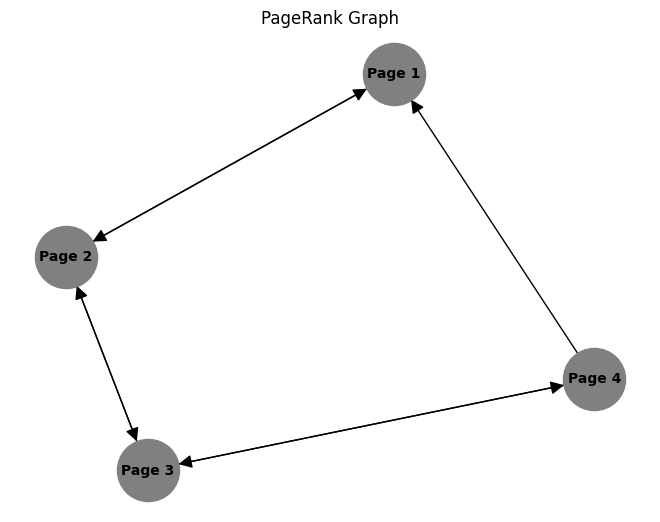

In [48]:
# Latihan 5
GraphAdjacencyMatrix(matrixKelima)

In [49]:
# Latihan 6
matrixKeenam = [[0, 1, 0, 0, 0],
          [0, 0, 1, 0, 0],
          [0, 0, 0, 1, 0],
          [1, 0, 0, 0, 1],
          [1, 0, 0, 0, 0]]

connections6 = [(1, 2), (2, 3), (3, 4), (4, 1), (4, 5), (5, 1)]

PageRank(matrixKeenam)

PR(Page 1) = 0.225
PR(Page 2) = 0.221
PR(Page 3) = 0.218
PR(Page 4) = 0.215
PR(Page 5) = 0.121


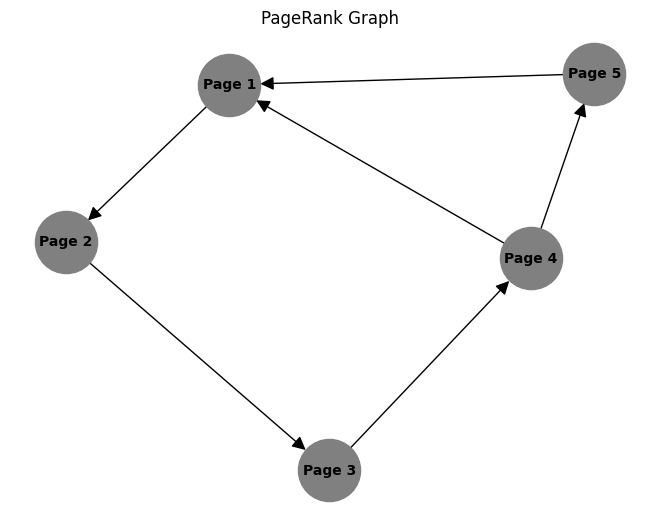

In [53]:
# Latihan 6
GraphAdjacencyMatrix(matrixKeenam)

In [51]:
# Latihan 7
matrixKetujuh = [[0, 1, 1],
                 [1, 0, 1],
                 [1, 1, 0]]

connections6 = [(1, 2),(1, 3),(2, 1), (2, 3), (3, 1),(3, 2)]

PageRank(matrixKetujuh)

PR(Page 1) = 0.333
PR(Page 2) = 0.333
PR(Page 3) = 0.333


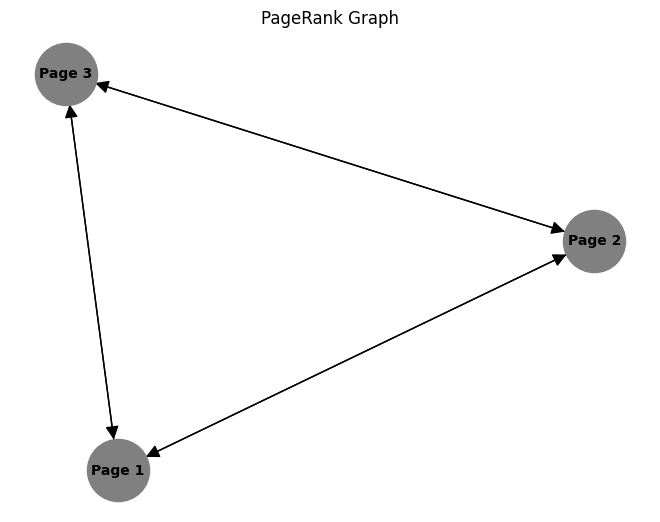

In [52]:
# Latihan 7
GraphAdjacencyMatrix(matrixKetujuh)